# PyMEOS

This Notebook contains a demo of basic functionality of PyMEOS, separated in 3 sections:
- Input
- Output
- Operations (examples with Pandas)

In [1]:
from pymeos import *
from datetime import datetime

pymeos_initialize()

## Input

### From Well-Know Text (WKT Spec: https://libmeos.org/movingfeaturesformats/wkt/)

In [2]:
TBoolInst('TRUE@2022-10-01')

TBoolInst(t@2022-10-01 00:00:00+02)

In [3]:
TGeomPointSeq('[Point(10 10)@2019-09-08, Point(20 20)@2019-09-09, Point(20 20)@2019-09-10]')

TGeomPointSeq([010100000000000000000024400000000000002440@2019-09-08 00:00:00+02, 010100000000000000000034400000000000003440@2019-09-09 00:00:00+02, 010100000000000000000034400000000000003440@2019-09-10 00:00:00+02])

In [4]:
TGeomPointSeq('Interp=Stepwise;[Point(10 10)@2019-09-08, Point(20 20)@2019-09-09, Point(20 20)@2019-09-10]') # With interpolation

TGeomPointSeq(Interp=Stepwise;[010100000000000000000024400000000000002440@2019-09-08 00:00:00+02, 010100000000000000000034400000000000003440@2019-09-09 00:00:00+02, 010100000000000000000034400000000000003440@2019-09-10 00:00:00+02])

In [5]:
TGeogPointSeqSet('{'
                 '[Point(10 10)@2019-09-08, Point(20 20)@2019-09-09, Point(30 30)@2019-09-10], '
                 '[Point(40 40)@2019-09-12, Point(50 50)@2019-09-13, Point(60 60)@2019-09-14]'
                 '}')

TGeogPointSeqSet({[0101000020E610000000000000000024400000000000002440@2019-09-08 00:00:00+02, 0101000020E610000000000000000034400000000000003440@2019-09-09 00:00:00+02, 0101000020E61000000000000000003E400000000000003E40@2019-09-10 00:00:00+02], [0101000020E610000000000000000044400000000000004440@2019-09-12 00:00:00+02, 0101000020E610000000000000000049400000000000004940@2019-09-13 00:00:00+02, 0101000020E61000000000000000004E400000000000004E40@2019-09-14 00:00:00+02]})

### From values

In [6]:
TBoolInst(value=True, timestamp=datetime(year=2022, month=10, day=1))

TBoolInst(t@2022-10-01 00:00:00+02)

In [7]:
TBoolInst(value='t', timestamp='2022-10-1')

TBoolInst(t@2022-10-01 00:00:00+02)

In [8]:
instants = [
    TGeomPointInst(point='Point(10 10)', timestamp='2019-09-08'),
    TGeomPointInst(point='Point(20 20)', timestamp='2019-09-09'),
    TGeomPointInst(point='Point(30 30)', timestamp='2019-09-10'),    
]
TGeomPointSeq(instant_list=instants)

TGeomPointSeq([010100000000000000000024400000000000002440@2019-09-08 00:00:00+02, 01010000000000000000003E400000000000003E40@2019-09-10 00:00:00+02))

In [9]:
TGeomPointSeq(instant_list=instants, lower_inc=False, upper_inc=True, normalize=False)

TGeomPointSeq((010100000000000000000024400000000000002440@2019-09-08 00:00:00+02, 010100000000000000000034400000000000003440@2019-09-09 00:00:00+02, 01010000000000000000003E400000000000003E40@2019-09-10 00:00:00+02])

In [10]:
TGeomPointSeq(instant_list=instants, interpolation=TInterpolation.DISCRETE)

TGeomPointSeq({010100000000000000000024400000000000002440@2019-09-08 00:00:00+02, 010100000000000000000034400000000000003440@2019-09-09 00:00:00+02, 01010000000000000000003E400000000000003E40@2019-09-10 00:00:00+02})

### From Well-Known Binary (WKB Spec: https://libmeos.org/movingfeaturesformats/wkb/) 

In [11]:
Temporal.from_hexwkb('010D000101009847E2EA8C0200')

TBoolInst(t@2022-10-01 00:00:00+02)

In [12]:
hex_value='011A000A03000000030000000000002440000000000000244000F8DA71FC340200000000000000344000000000000034400058B28F103502000000000000003440000000000000344000B889AD24350200'
Temporal.from_hexwkb(hex_value)

TGeomPointSeq(Interp=Stepwise;[010100000000000000000024400000000000002440@2019-09-08 00:00:00+02, 010100000000000000000034400000000000003440@2019-09-09 00:00:00+02, 010100000000000000000034400000000000003440@2019-09-10 00:00:00+02])

### From Moving Features JSON (MF-JSon Spec: https://docs.opengeospatial.org/is/19-045r3/19-045r3.html)

In [13]:
mf_json = '''{
   "type": "MovingBoolean",
   "stBoundedBy": {
     "period": {
       "begin": "2022-10-01T00:00:00+02",
       "end": "2022-10-01T00:00:00+02",
       "lower_inc": true,
       "upper_inc": true
     }
   },
   "values": true,
   "datetimes": "2022-10-01T00:00:00+02",
   "interpolations": [
     "Discrete"
   ]
 }'''
Temporal.from_mfjson(mf_json)

TBoolInst(t@2022-10-01 00:00:00+02)

In [14]:
mf_json = '''{
   "type": "MovingGeomPoint",
   "stBoundedBy": {
     "bbox": [
       [10,10],
       [20,20]
     ],
     "period": {
       "begin": "2019-09-08T00:00:00+02",
       "end": "2019-09-10T00:00:00+02"
     }
   },
   "coordinates": [
     [10,10],
     [20,20],
     [20,20]
   ],
   "datetimes": [
     "2019-09-08T00:00:00+02",
     "2019-09-09T00:00:00+02",
     "2019-09-10T00:00:00+02"
   ],
   "lower_inc": true,
   "upper_inc": true,
   "interpolations": [
     "Stepwise"
   ]
 }'''
Temporal.from_mfjson(mf_json)

TGeomPointSeq(Interp=Stepwise;[010100000000000000000024400000000000002440@2019-09-08 00:00:00+02, 010100000000000000000034400000000000003440@2019-09-09 00:00:00+02, 010100000000000000000034400000000000003440@2019-09-10 00:00:00+02])

## Output

### To Well-Know Text (WKT Spec: https://libmeos.org/movingfeaturesformats/wkt/)

In [15]:
value = TFloatInst('0.123456789@2022-10-01')
str(value)

'0.12346@2022-10-01 00:00:00+02'

In [16]:
value.as_wkt(precision=10)

'0.123456789@2022-10-01 00:00:00+02'

### To Well-Known Binary (WKB Spec: https://libmeos.org/movingfeaturesformats/wkb/) 

In [17]:
value.as_hexwkb()

'011300015F633937DD9ABF3F009847E2EA8C0200'

### To Moving Features JSON (MF-JSon Spec: https://docs.opengeospatial.org/is/19-045r3/19-045r3.html)

In [18]:
print(value.as_mfjson())

{
   "type": "MovingFloat",
   "stBoundedBy": {
     "bbox": [
       0.123457,
       0.123457
     ],
     "period": {
       "begin": "2022-10-01T00:00:00+02",
       "end": "2022-10-01T00:00:00+02"
     }
   },
   "values": 0.123457,
   "datetimes": "2022-10-01T00:00:00+02",
   "interpolations": [
     "Discrete"
   ]
 }


In [19]:
print(value.as_mfjson(flags=6, precision=3))

{
  "type":"MovingFloat",
  "stBoundedBy":{
    "bbox":[
      0.123,
      0.123
    ],
    "period":{
      "begin":"2022-10-01T00:00:00+02",
      "end":"2022-10-01T00:00:00+02"
    }
  },
  "values":0.123,
  "datetimes":"2022-10-01T00:00:00+02",
  "interpolations":[
    "Discrete"
  ]
}


### To GeoJSON (only for TPoint, GeoJSON spec: https://geojson.org/)

In [20]:
value = TGeomPointSeq('[Point(10 10)@2019-09-08, Point(20 20)@2019-09-09, Point(20 20)@2019-09-10]')
print(value.as_geojson())

{"type":"LineString","bbox":[10.000000,10.000000,20.000000,20.000000],"coordinates":[[10,10],[20,20]]}


### To Shapely Geometry (Only for TPoint)

LINESTRING (10 10, 20 20)


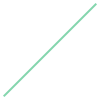

In [21]:
print(value.to_shapely_geometry())
value.to_shapely_geometry()

## Operations + Pandas integration

In [22]:
import pandas as pd
from shapely.geometry import Polygon
from shapely import wkb
import postgis as pg
import matplotlib.pyplot as plt

In [23]:
trips = pd.read_csv('./trips.csv', converters={'trip': Temporal.from_hexwkb})
trips.head()

,vehicle,day,seq,trip
0,1,2020-06-01,1,[0101000000A5218194E3211E41EB9B43431A1A5941@20...
1,1,2020-06-01,2,[010100000036A6A116E0F51D410818EC5287315941@20...
2,1,2020-06-02,1,[0101000000A5218194E3211E41EB9B43431A1A5941@20...
3,1,2020-06-02,2,[010100000036A6A116E0F51D410818EC5287315941@20...
4,1,2020-06-03,1,[0101000000A5218194E3211E41EB9B43431A1A5941@20...


In [24]:
trips['trajectory'] = trips['trip'].apply(lambda trip: trip.to_shapely_geometry())
day_trips = trips[trips['day'] == '2020-06-01'].copy()

In [25]:
day_trips.head()

,vehicle,day,seq,trip,trajectory
0,1,2020-06-01,1,[0101000000A5218194E3211E41EB9B43431A1A5941@20...,"LINESTRING (493688.895024 6580329.051002, 4936..."
1,1,2020-06-01,2,[010100000036A6A116E0F51D410818EC5287315941@20...,"LINESTRING (490872.022101 6604317.29566, 49087..."
8,2,2020-06-01,1,[0101000000F2CC1014306F1D4113BAF7554A1A5941@20...,"LINESTRING (482252.019595 6580521.343245, 4822..."
9,2,2020-06-01,2,[0101000000BBB9695FBC111E419BDF99EFA41D5941@20...,"LINESTRING (492655.093177 6583955.743767, 4926..."
16,3,2020-06-01,1,[0101000000217D2E419B471E41A4DF478994285941@20...,"LINESTRING (496102.813654 6595154.145012, 4961..."


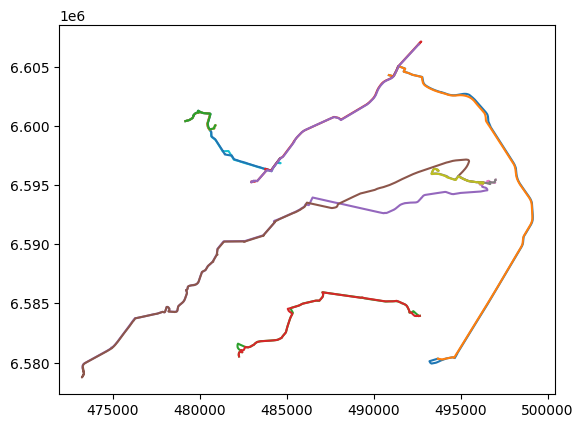

In [26]:
fig, ax = plt.subplots()
for trip in day_trips['trajectory']:
    ax.plot(*trip.xy)

### Spatial Intersection

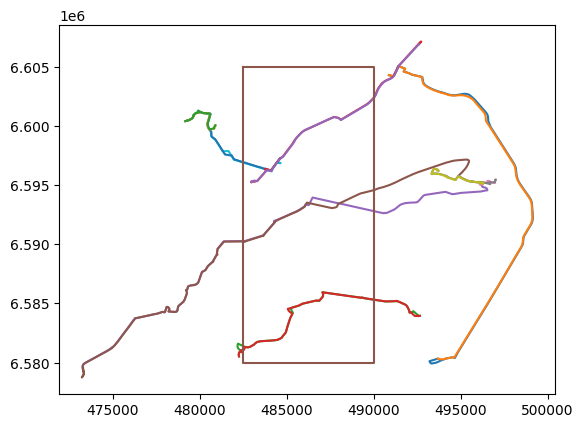

In [27]:
polygon = Polygon([(482500, 6605000), (490000, 6605000), (490000, 6580000), (482500, 6580000)])
fig, ax = plt.subplots()
for trip in day_trips['trajectory']:
    ax.plot(*trip.xy)
ax.plot(*polygon.exterior.xy)

In [28]:
postgis_polygon = pg.Geometry.from_ewkb(polygon.wkb_hex)
day_trips['spatial_cut'] = day_trips['trip'].apply(lambda trip: trip.at(postgis_polygon))
day_trips['spatial_cut_trajectory'] = day_trips['spatial_cut'].apply(lambda trip: trip.to_shapely_geometry() if trip else None)
day_trips.head()

,vehicle,day,seq,trip,trajectory,spatial_cut,spatial_cut_trajectory
0,1,2020-06-01,1,[0101000000A5218194E3211E41EB9B43431A1A5941@20...,"LINESTRING (493688.895024 6580329.051002, 4936...",None,None
1,1,2020-06-01,2,[010100000036A6A116E0F51D410818EC5287315941@20...,"LINESTRING (490872.022101 6604317.29566, 49087...",None,None
8,2,2020-06-01,1,[0101000000F2CC1014306F1D4113BAF7554A1A5941@20...,"LINESTRING (482252.019595 6580521.343245, 4822...",{[010100000044ACFDFF0F731D4115CACF84241B5941@2...,"LINESTRING (482499.999991 6581394.075182, 4825..."
9,2,2020-06-01,2,[0101000000BBB9695FBC111E419BDF99EFA41D5941@20...,"LINESTRING (492655.093177 6583955.743767, 4926...",{[01010000001FAC010040E81D418A4F8A46FC1E5941@2...,"LINESTRING (490000.000006 6585329.102192, 4899..."
16,3,2020-06-01,1,[0101000000217D2E419B471E41A4DF478994285941@20...,"LINESTRING (496102.813654 6595154.145012, 4961...",{[01010000008313010040E81D41E3F33E984B265941@2...,"LINESTRING (490000.000004 6592814.378842, 4899..."


[471915.82342415,
 500449.53141485,
 6577319.2787442,
 6608586.762965799,
 471915.82342415,
 500449.53141485,
 6577319.2787442,
 6608586.762965799]

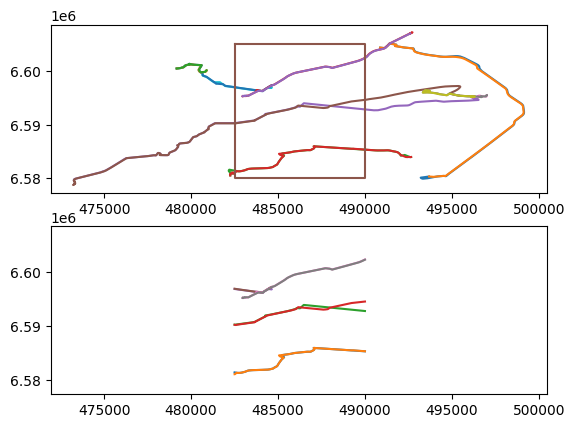

In [29]:
fig, ax = plt.subplots(2)
for trip in day_trips['trajectory']:
    ax[0].plot(*trip.xy)
ax[0].plot(*polygon.exterior.xy)
for trip in day_trips['spatial_cut_trajectory']:
    if trip:
        ax[1].plot(*trip.xy)
plt.setp(ax, xlim=ax[0].get_xlim(), ylim=ax[0].get_ylim())

### Temporal Intersection

In [30]:
period = Period('(2020-06-01 09:40:00+02, 2020-06-01 10:06:00+02)')
day_trips['temporal_cut'] = day_trips['trip'].apply(lambda trip: trip.at(period))
day_trips['temporal_cut_trajectory'] = day_trips['temporal_cut'].apply(lambda trip: trip.to_shapely_geometry() if trip else None)
day_trips.head()

,vehicle,day,seq,trip,trajectory,spatial_cut,spatial_cut_trajectory,temporal_cut,temporal_cut_trajectory
0,1,2020-06-01,1,[0101000000A5218194E3211E41EB9B43431A1A5941@20...,"LINESTRING (493688.895024 6580329.051002, 4936...",None,None,(01010000001E41076E8B4A1E41B6FB6355001E5941@20...,"LINESTRING (496290.85745 6584321.334227, 49633..."
1,1,2020-06-01,2,[010100000036A6A116E0F51D410818EC5287315941@20...,"LINESTRING (490872.022101 6604317.29566, 49087...",None,None,None,None
8,2,2020-06-01,1,[0101000000F2CC1014306F1D4113BAF7554A1A5941@20...,"LINESTRING (482252.019595 6580521.343245, 4822...",{[010100000044ACFDFF0F731D4115CACF84241B5941@2...,"LINESTRING (482499.999991 6581394.075182, 4825...",(0101000000558824ABCC8E1D4119ABB6419F1B5941@20...,"LINESTRING (484275.167132 6581885.026774, 4843..."
9,2,2020-06-01,2,[0101000000BBB9695FBC111E419BDF99EFA41D5941@20...,"LINESTRING (492655.093177 6583955.743767, 4926...",{[01010000001FAC010040E81D418A4F8A46FC1E5941@2...,"LINESTRING (490000.000006 6585329.102192, 4899...",None,None
16,3,2020-06-01,1,[0101000000217D2E419B471E41A4DF478994285941@20...,"LINESTRING (496102.813654 6595154.145012, 4961...",{[01010000008313010040E81D41E3F33E984B265941@2...,"LINESTRING (490000.000004 6592814.378842, 4899...",None,None


[471915.82342415,
 500449.53141485,
 6577319.2787442,
 6608586.762965799,
 471915.82342415,
 500449.53141485,
 6577319.2787442,
 6608586.762965799]

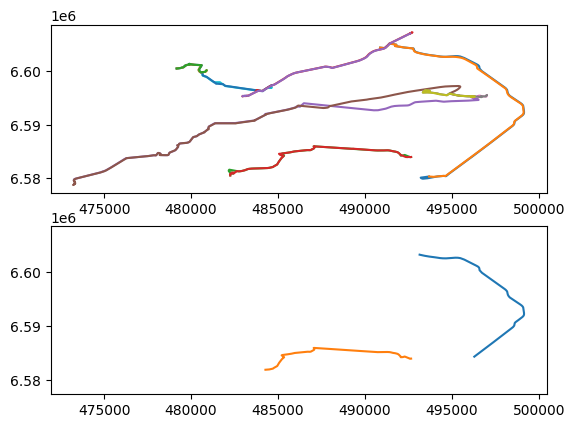

In [31]:
fig, ax = plt.subplots(2)
for trip in day_trips['trajectory']:
    ax[0].plot(*trip.xy)
for trip in day_trips['temporal_cut_trajectory']:
    if trip:
        ax[1].plot(*trip.xy)
plt.setp(ax, xlim=ax[0].get_xlim(), ylim=ax[0].get_ylim())

In [32]:
pymeos_finalize()